# Generate freq data from models

In [3]:
from koselleck import *

In [4]:
dfpath=get_pathdf_models_bydecade(ymin=1680, ymax=1980)
dfpath

,corpus,period_start,period_end,path,path_vocab,run,period,period_len
310,bpo,1680,1690,/home/ryan/github/koselleck/data/models/bpo/16...,/home/ryan/github/koselleck/data/models/bpo/16...,run_01,1680-1690,10
317,bpo,1680,1690,/home/ryan/github/koselleck/data/models/bpo/16...,/home/ryan/github/koselleck/data/models/bpo/16...,run_02,1680-1690,10
299,bpo,1680,1690,/home/ryan/github/koselleck/data/models/bpo/16...,/home/ryan/github/koselleck/data/models/bpo/16...,run_03,1680-1690,10
308,bpo,1680,1690,/home/ryan/github/koselleck/data/models/bpo/16...,/home/ryan/github/koselleck/data/models/bpo/16...,run_04,1680-1690,10
312,bpo,1680,1690,/home/ryan/github/koselleck/data/models/bpo/16...,/home/ryan/github/koselleck/data/models/bpo/16...,run_05,1680-1690,10
...,...,...,...,...,...,...,...,...
230,bpo,1870,1880,/home/ryan/github/koselleck/data/models/bpo/18...,/home/ryan/github/koselleck/data/models/bpo/18...,run_05,1870-1880,10
226,bpo,1870,1880,/home/ryan/github/koselleck/data/models/bpo/18...,/home/ryan/github/koselleck/data/models/bpo/18...,run_06,1870-1880,10
227,bpo,1870,1880,/home/ryan/github/koselleck/data/models/bpo/18...,/home/ryan/github/koselleck/data/models/bpo/18...,run_07,1870-1880,10
544,bpo,1880,1890,/home/ryan/github/koselleck/data/models/bpo/18...,/home/ryan/github/koselleck/data/models/bpo/18...,run_01,1880-1890,10


In [5]:
def get_freq(dfpath,num_proc=1,**attrs):
    return pmap_groups(
        do_get_freq,
        dfpath.groupby('period'),
        num_proc=num_proc,
        kwargs=attrs
    )
    

def do_get_freq(gdf,words=None):
    m=load_model_row(gdf.iloc[0])
    vocabd=dict(
        (
            w,
            m.wv.get_vecattr(w,'count')
        )
        for w in m.wv.key_to_index
        if not words or w in set(words)
    )
    svocab=pd.Series(vocabd)
    svocabtf=svocab / svocab.sum()
    return pd.DataFrame([svocabtf])

In [7]:
dffreq=get_freq(dfpath, words=get_valid_words(), num_proc=4)
dffreq

Mapping do_get_freq [x4]: 100%|██████████| 20/20 [01:05<00:00,  3.27s/it]


,church,time,king,author,man,fame,god,country,day,part,...,cycling,booklet,massage,aeroplane,underwear,radio,chiffon,wireless,unemployment,automobile
period,,,,,,,,,,,,,,,,,,,,,
1700-1710,0.011924,0.011726,0.011150,0.009555,0.008805,0.008388,0.008031,0.007564,0.007402,0.006811,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1710-1720,0.006658,0.013249,0.009218,0.005562,0.008192,0.010260,0.005199,0.003895,0.008783,0.006593,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1720-1730,0.004835,0.012589,0.010128,0.003873,0.005330,0.011026,0.003701,0.003310,0.010873,0.006157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1730-1740,0.003707,0.010267,0.007152,0.004743,0.007822,0.008712,0.003415,0.004648,0.007138,0.005706,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1740-1750,0.002377,0.010874,0.006903,0.003276,0.007832,0.008151,0.002686,0.005020,0.008294,0.006089,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1750-1760,0.002439,0.012017,0.006636,0.004045,0.007563,0.008685,0.003219,0.004931,0.007084,0.006880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1760-1770,0.002498,0.011772,0.006390,0.004446,0.007419,0.008708,0.003038,0.004961,0.006450,0.006781,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1770-1780,0.002205,0.010771,0.004806,0.004328,0.008721,0.007722,0.003472,0.005274,0.006308,0.006609,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1780-1790,0.002220,0.010988,0.004422,0.004110,0.007345,0.007350,0.004161,0.005221,0.006913,0.006889,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
dffreq.T.rename_axis('word').to_csv(FN_FREQ_DEC_MODELS)

In [26]:
dff=get_dfpiv_freq(words=get_valid_words(), z=True)
dff

100%|██████████| 6000/6000 [00:04<00:00, 1254.78it/s]


,1700,1710,1720,1730,1740,1750,1760,1770,1780,1790,1800,1810,1820,1830,1840,1850,1860,1870,1880,1890
word,,,,,,,,,,,,,,,,,,,,
church,3.625553,1.220107,0.386992,-0.128002,-0.735490,-0.707256,-0.680195,-0.814277,-0.807243,-0.658923,-0.589553,-0.321836,-0.317954,0.252907,0.511147,-0.160069,0.117807,-0.103021,-0.135241,0.044546
time,1.001607,2.268139,1.719162,-0.211577,0.293067,1.243647,1.040533,0.208010,0.388598,-0.129166,-0.981101,-1.155958,-1.090242,-1.153335,-0.768492,-0.483359,-0.422549,-0.417908,-0.572523,-0.776552
king,2.186268,1.519802,1.833610,0.806764,0.720812,0.628517,0.543539,-0.003144,-0.135582,-0.051327,-0.648383,-0.669025,-0.611122,-0.696839,-0.769792,-0.866287,-0.868824,-0.958442,-0.958395,-1.002151
author,3.401690,1.080517,0.098922,0.604573,-0.248101,0.198726,0.431578,0.363315,0.236502,0.248105,0.231821,-0.494880,-0.311486,-0.625393,-0.840726,-0.738673,-0.932472,-0.873944,-0.885181,-0.944895
man,1.686460,0.991184,-2.254409,0.571677,0.583175,0.277628,0.114722,1.590168,0.030846,0.347922,-1.317646,-1.678946,-0.767844,-0.505813,-0.461913,-0.380146,0.764331,0.434214,-0.288337,0.262728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
radio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.707107,0.707107
chiffon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wireless,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:>

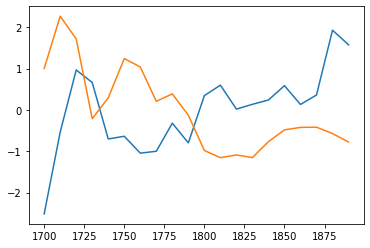

In [24]:
dff.loc['value'].plot()
dff.loc['time'].plot()
